In [177]:
import numpy as np
import matplotlib.pyplot as plt

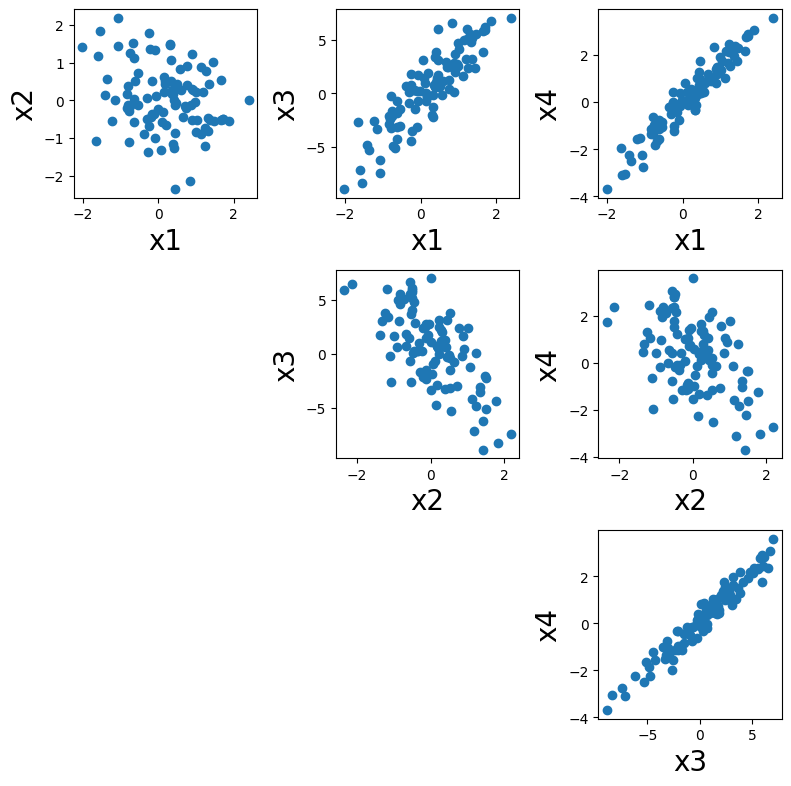

In [194]:
x = np.random.normal(0,1,(100,4))
x[:,2] = 3 * x[:,0] - 2 * x[:,1] + np.random.normal(0, 0.1, 100)
x[:,3] = 1.5 * x[:,0] - 0.5 * x[:,1] + np.random.normal(0, 0.1, 100)
plt.figure(figsize=(10,10))
for i in range(4):
    for j in range(4):
        if j > i:
            plt.subplot(4,4,i*4+j+1)
            plt.scatter(x[:,i], x[:,j])
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
plt.tight_layout()

In [200]:

class PCA:
    def __init__(self,k_component):
        self.mean = None
        self.k_component = k_component
        self.components = None

    def fit(self,X):
        #get mean
        self.mean = np.mean(X,axis=0)
        # print(self.mean)
        print("Shape of X",X.shape)
        print("Shape of mean",self.mean.shape)
        #centring 
        X = (X - self.mean) 
        # print(X)
        print("Shape of X",X.shape)
        #calculate the covariance, here we have to give sample as columns, but in our array we have row wise arranged it
        covariance = np.cov(X,rowvar=False)
        print("shape of covariance", covariance.shape)

        #get eigen value and eigen vector of covariance matrix
        e_values,e_vectors=np.linalg.eig(covariance)
        print("shape of e_vectors",e_vectors.shape)
        e_vectors = e_vectors.T
        print("shape of e_vectors after transpose",e_vectors.shape)
        

        # print(e_values)
        #sort the eigenvalues and eigenvectors
        idx = np.argsort(e_values)[::-1]
        # print(idx)
        e_values = e_values[idx]
        e_vectors = e_vectors[idx]

        # print(e_vectors)

        self.components = e_vectors[:self.k_component]


    def transform(self, X):
        # projects data
        X = X - self.mean
        return np.dot(X, self.components.T)
        
    def transform(self,X):
        X = X-self.mean
        projection =  np.dot(X,self.components.T)
        return projection
        
    


# print(x)
mypca =PCA(30)

mypca.fit(x)
mypca.transform(x)
mypca.components

Shape of X (100, 4)
Shape of mean (4,)
Shape of X (100, 4)
shape of covariance (4, 4)
shape of e_vectors (4, 4)
shape of e_vectors after transpose (4, 4)


array([[ 0.2045823 , -0.14018609,  0.89288767,  0.37582648],
       [-0.48540836, -0.78933636,  0.13497508, -0.35086831],
       [-0.16394006, -0.33977408, -0.37264367,  0.84782895],
       [-0.83405543,  0.49178202,  0.21370547,  0.12973805]])

In [201]:
#Checking with sklearn version
from sklearn.decomposition import PCA
pca =PCA(n_components=4)
pca.fit(x)
pca.transform(x)
pca.components_


array([[ 0.2045823 , -0.14018609,  0.89288767,  0.37582648],
       [ 0.48540836,  0.78933636, -0.13497508,  0.35086831],
       [-0.16394006, -0.33977408, -0.37264367,  0.84782895],
       [ 0.83405543, -0.49178202, -0.21370547, -0.12973805]])